<a href="https://colab.research.google.com/github/YingxiC/stats415-final-project/blob/main/STATS415_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.manifold import TSNE
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:

# load data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
features = list()
with open("/content/drive/My Drive/415 final project/features.txt") as f:
    features = [line.split()[1] for line in f.readlines()]

print("Number of Features: {}".format(len(features)))

Number of Features: 561


In [ ]:
# read in
x_train_path = '/content/drive/My Drive/415 final project/train/X_train.txt'
X_train = pd.read_csv(x_train_path, delim_whitespace=True, header=None)
X_train.columns = features


y_train_path = '/content/drive/My Drive/415 final project/train/y_train.txt'
#y_train = pd.read_csv(y_train_path, delim_whitespace=True, header=None)
y_train = pd.read_csv(y_train_path, names=['Activity'])

# Map activity labels to their names
y_train['Activity'] = y_train['Activity'].map({
    1: 'Walking',
    2: 'Walking_Upstair',
    3: 'Walking_Downstair',
    4: 'Sitting',
    5: 'Standing',
    6: 'Laying'
})

# Display the first few rows
print(y_train.head())


<ipython-input-26-a162fa0baa28>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(x_train_path, delim_whitespace=True, header=None)


   Activity
0  Standing
1  Standing
2  Standing
3  Standing
4  Standing


In [ ]:
# check w/ gsi
print(f"Total Features: {len(features)}")
print(f"Unique Features: {len(set(features))}")
duplicates = [feature for feature in features if features.count(feature) > 1]
print(f"Duplicate Features: {duplicates}")


Total Features: 561
Unique Features: 477
Duplicate Features: ['fBodyAcc-bandsEnergy()-1,8', 'fBodyAcc-bandsEnergy()-9,16', 'fBodyAcc-bandsEnergy()-17,24', 'fBodyAcc-bandsEnergy()-25,32', 'fBodyAcc-bandsEnergy()-33,40', 'fBodyAcc-bandsEnergy()-41,48', 'fBodyAcc-bandsEnergy()-49,56', 'fBodyAcc-bandsEnergy()-57,64', 'fBodyAcc-bandsEnergy()-1,16', 'fBodyAcc-bandsEnergy()-17,32', 'fBodyAcc-bandsEnergy()-33,48', 'fBodyAcc-bandsEnergy()-49,64', 'fBodyAcc-bandsEnergy()-1,24', 'fBodyAcc-bandsEnergy()-25,48', 'fBodyAcc-bandsEnergy()-1,8', 'fBodyAcc-bandsEnergy()-9,16', 'fBodyAcc-bandsEnergy()-17,24', 'fBodyAcc-bandsEnergy()-25,32', 'fBodyAcc-bandsEnergy()-33,40', 'fBodyAcc-bandsEnergy()-41,48', 'fBodyAcc-bandsEnergy()-49,56', 'fBodyAcc-bandsEnergy()-57,64', 'fBodyAcc-bandsEnergy()-1,16', 'fBodyAcc-bandsEnergy()-17,32', 'fBodyAcc-bandsEnergy()-33,48', 'fBodyAcc-bandsEnergy()-49,64', 'fBodyAcc-bandsEnergy()-1,24', 'fBodyAcc-bandsEnergy()-25,48', 'fBodyAcc-bandsEnergy()-1,8', 'fBodyAcc-bandsEnergy(

In [ ]:
display(X_train.head())
display(y_train.head())

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


,Activity
0,Standing
1,Standing
2,Standing
3,Standing
4,Standing


In [ ]:
# Putting all columns in a single Dataframe

train = X_train
train['Activity'] = y_train
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
1666,0.278848,-0.016486,-0.109023,-0.995316,-0.988498,-0.988799,-0.995766,-0.989522,-0.988478,-0.939555,...,-0.631062,-0.909298,-0.415508,-0.219901,0.364134,0.066935,-0.635035,-0.114438,-0.125021,Sitting


In [ ]:
X_train_rf = X_train.copy()

In [ ]:
train.shape

(7352, 562)

In [ ]:
# read in
x_test_path = '/content/drive/My Drive/415 final project/test/X_test.txt'
X_test = pd.read_csv(x_test_path, delim_whitespace=True, header=None)
X_test.columns = features


y_test_path = '/content/drive/My Drive/415 final project/test/y_test.txt'
#y_test = pd.read_csv(y_test_path, delim_whitespace=True, header=None)
y_test = pd.read_csv(y_test_path, names=['Activity'])


<ipython-input-32-26d4afa602dd>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(x_test_path, delim_whitespace=True, header=None)


In [ ]:
# Map activity labels to their names
y_test['Activity'] = y_test['Activity'].map({
    1: 'Walking',
    2: 'Walking_Upstair',
    3: 'Walking_Downstair',
    4: 'Sitting',
    5: 'Standing',
    6: 'Laying'
})

# Display the first few rows
print(y_test.head())


   Activity
0  Standing
1  Standing
2  Standing
3  Standing
4  Standing


In [ ]:
test = X_test
test['Activity'] = y_test
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
1975,0.236554,0.009314,-0.063559,-0.367035,-0.247763,-0.525874,-0.393119,-0.223207,-0.506306,-0.182126,...,-0.597187,-0.884791,0.309666,-0.89758,0.979846,-0.717064,-0.753707,0.255929,-0.047708,Walking


#EDA(Exploratory Data Analysis)

## Data Cleaning


In [ ]:
print('Number of duplicate entries in train data {}'.format(sum(train.duplicated())))

Number of duplicate entries in train data 0


In [ ]:
print('Number of duplicate entries in test data {}'.format(sum(test.duplicated())))

Number of duplicate entries in test data 0


In [ ]:
print('Number of NaN/Null values in train data {}'.format(train.isnull().values.sum()))

Number of NaN/Null values in train data 0


In [ ]:
print('Number of NaN/Null values in test data {}'.format(test.isnull().values.sum()))

Number of NaN/Null values in test data 0


Check for Data Imbalanced

In [ ]:
# Path to the subject_test data
subject_test_path = '/content/drive/My Drive/415 final project/test/subject_test.txt'
# Load the subject_test data
Subject = pd.read_csv(subject_test_path, header=None)

# Add the 'Subject' column to the X_test DataFrame
test['Subject'] = Subject

# Path to the subject_test data
subject_train_path = '/content/drive/My Drive/415 final project/train/subject_train.txt'
# Load the subject_test data
Subject2 = pd.read_csv(subject_train_path, header=None)
train['Subject'] = Subject2



[]

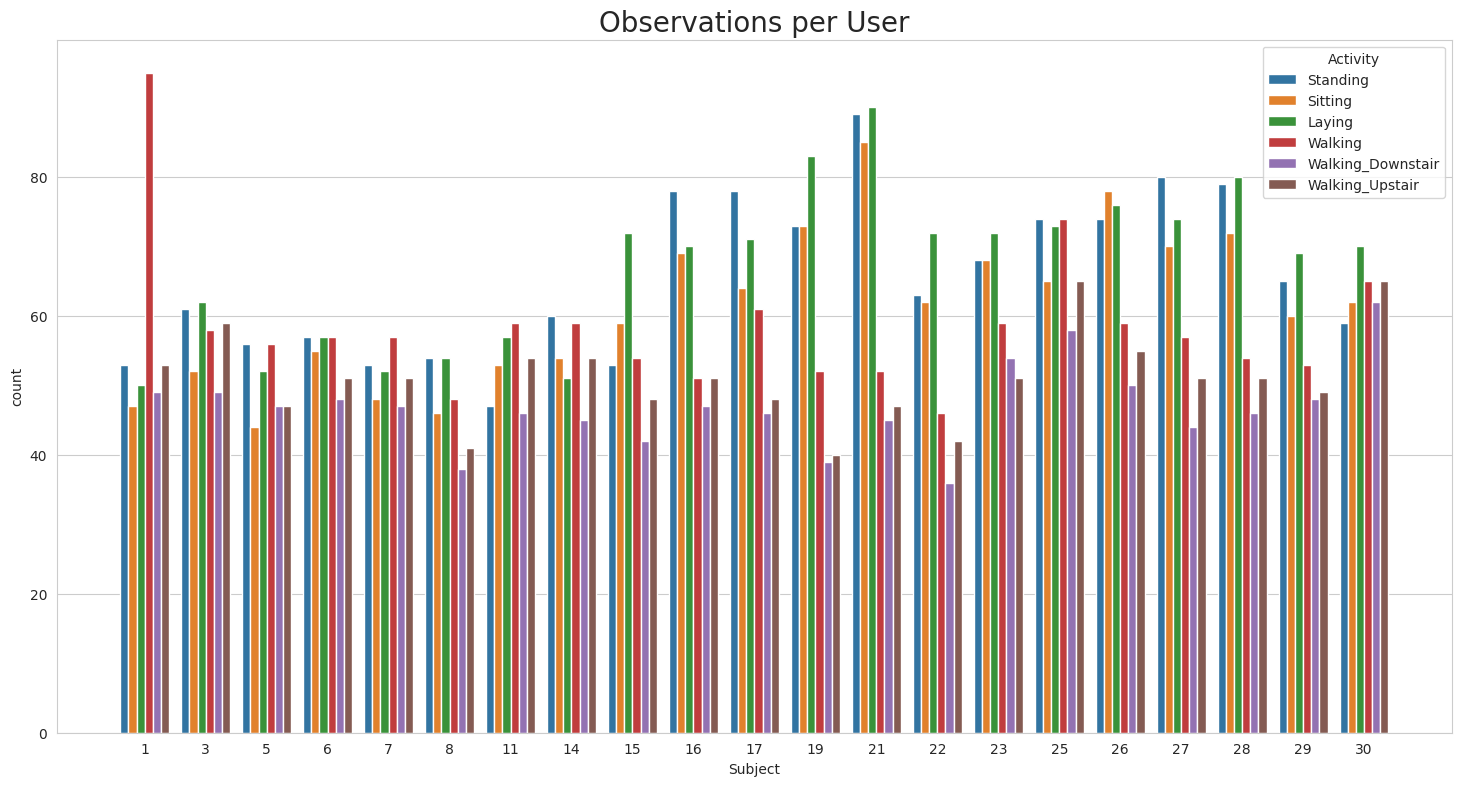

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,9))
plt.title('Observations per User', fontsize=20)
sns.countplot(x='Subject', hue='Activity', data=train)
plt.plot()

In [ ]:
activity_counts = train['Activity'].value_counts()
print(activity_counts)

Activity
Laying               1407
Standing             1374
Sitting              1286
Walking              1226
Walking_Upstair      1073
Walking_Downstair     986
Name: count, dtype: int64


In [ ]:
def gini_coefficient(array):
    """Calculate the Gini coefficient of a numpy array."""
    array = np.sort(array)
    n = array.shape[0]
    index = np.arange(1, n + 1)
    return ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))

activity_array = activity_counts.values
gini = gini_coefficient(activity_array)
print("Gini Coefficient:", gini)

Gini Coefficient: 0.06955023576351106


The Gini Coefficient we get is 0.069, so the data is approximately balanced.


In [ ]:
activity_counts = train['Activity'].value_counts()

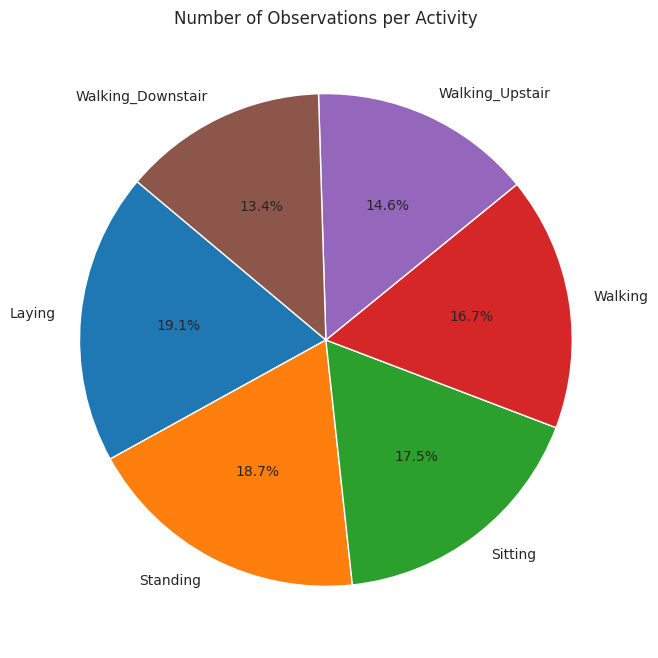

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Observations per Activity')
plt.show()


In [ ]:
# Initial names of the columns
columns = train.columns
columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity', 'Subject'],
      dtype='object', length=563)

In [ ]:
# Removing (), - and , from column names
columns = columns.str.replace('[()]', '', regex=True)
columns = columns.str.replace('[-]', '', regex=True)
columns = columns.str.replace('[,]', '', regex=True)

# Assign cleaned column names back to train and test
train.columns = columns
test.columns = columns

In [ ]:
# Displaying new names
train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'Activity', 'Subject'],
      dtype='object', length=563)

In [ ]:
X_train.shape[0]

7352

In [ ]:
X_train.shape[1]

563

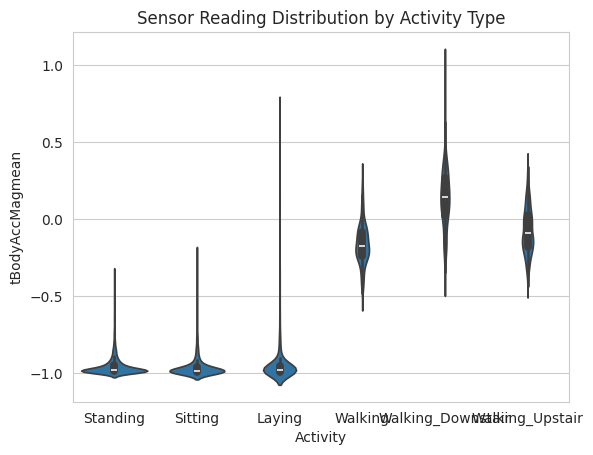

In [ ]:
sns.violinplot(x='Activity', y='tBodyAccMagmean', data=train)
plt.title('Sensor Reading Distribution by Activity Type')
plt.show()

## Static vs. Dynamic Activities

Static activities, such as Standing, Sitting, and Laying, exhibit consistently low energy values across all axes with minimal variability, reflecting limited motion. These activities also have low gravitational entropy, indicating predictable and steady gravitational acceleration. In contrast, dynamic activities, including Walking, Walking_Upstairs, and Walking_Downstairs, show significantly higher body acceleration jerk energy and greater variability, capturing the continuous and abrupt movements involved. Features such as **tGravityAccMagentropy** for gravitational entropy and **tBodyAccJerkenergyX**, **tBodyAccJerkenergyY**, and **tBodyAccJerkenergyZ** for body acceleration jerk energy are key to distinguishing between these activity types.

**tGravityAccMagentropy** is selected for its ability to capture the variability and irregularity of gravitational acceleration, making it essential for distinguishing between static and dynamic activities. Static activities exhibit low entropy due to minimal variations, while dynamic activities show higher entropy from irregular movements.

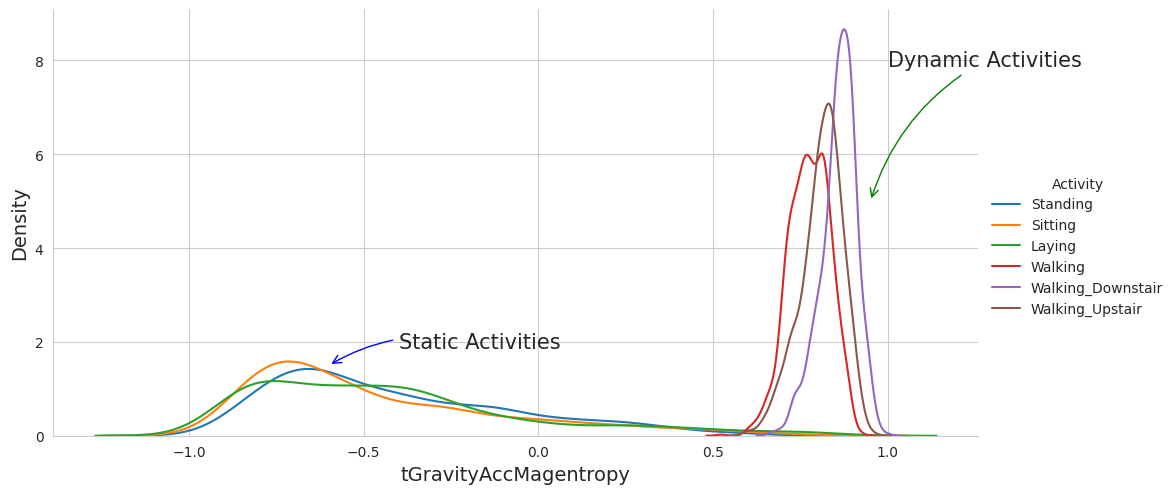

In [ ]:
# Features to analyze
features = ['tGravityAccMagentropy']

for i, feature in enumerate(features):
    # Create the FacetGrid for plotting
    facetgrid = sns.FacetGrid(data=train, hue='Activity', height=5, aspect=2)
    facetgrid.map(sns.kdeplot, feature, bw_adjust=1, fill=False).add_legend()

    # Annotate the plot for static and dynamic activities
    plt.annotate(
        "Static Activities",
        xy=(-0.6, 1.5), xytext=(-0.4, 2), size=15,
        va='center', ha='left',
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color='blue')
    )

    plt.annotate(
        "Dynamic Activities",
        xy=(0.95, 5), xytext=(1, 8), size=15,
        va='center', ha='left',
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color='green')
    )

    # Label axes
    plt.xlabel(feature, fontsize=14)
    plt.ylabel("Density", fontsize=14)

    # Show the plot
    plt.show()

## Comparison of Jerk Energy Across Activities in X, Y, and Z Axes

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# LDA
lda = LDA()
X_train = train.drop(['Subject', 'Activity'], axis=1)
X_test = test.drop(['Subject', 'Activity'], axis=1)
y_train = train.Activity
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


# PCA
# X_train = train.drop(['Subject', 'Activity'], axis=1)
# X_test = test.drop(['Subject', 'Activity'], axis=1)
# y_train = train.Activity

# pca = PCA(n_components=0.95)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [ ]:
# Extract feature names by dropping non-feature columns ('Subject' and 'Activity')
feature_names = train.drop(['Subject', 'Activity'], axis=1).columns

# Retrieve the LDA coefficients (scalings_)
# This represents the weights assigned to each feature for creating the linear discriminant axes
coefficients = lda.scalings_

# Use the first discriminant only
first_discriminant = coefficients[:, 0]

# Map coefficients to feature names
feature_importance = pd.DataFrame({
    'Weight': first_discriminant,
    'Abs_Weight': abs(first_discriminant)
}, index=feature_names)

# Sort by absolute weight
sorted_features = feature_importance.sort_values(by='Abs_Weight', ascending=False)

print("Features sorted by importance for the first discriminant:")
print(sorted_features.head(15))


Features sorted by importance for the first discriminant:
                                 Weight  Abs_Weight
tBodyAccJerkenergyZ          684.178782  684.178782
tBodyAccJerkenergyX         -305.357168  305.357168
tBodyAccJerkenergyY         -268.628520  268.628520
fBodyAccJerkbandsEnergy1732 -107.249644  107.249644
fBodyAccJerkbandsEnergy1724  -88.629942   88.629942
fBodyAccJerkbandsEnergy2532  -87.991985   87.991985
fBodyAccJerkenergyZ          -84.218524   84.218524
tBodyAccJerkMagenergy        -70.717005   70.717005
fBodyAccJerkbandsEnergy2548  -70.158935   70.158935
tBodyAccstdX                  69.086734   69.086734
fBodyAccJerkbandsEnergy124   -68.307582   68.307582
fBodyAccJerkbandsEnergy124    56.579363   56.579363
fBodyAccJerkbandsEnergy116    55.631990   55.631990
tBodyAccstdY                  53.800978   53.800978
fBodyAccJerkenergyX           49.336712   49.336712


Similarly, **tBodyAccJerkenergyX, tBodyAccJerkenergyY, and tBodyAccJerkenergyZ** are chosen based on their high importance in the first discriminant, with absolute weights of 684.18, 305.36, and 268.63, respectively. These features effectively capture jerk energy along the X, Y, and Z axes, making them crucial for separating static and dynamic motion patterns.

<ipython-input-55-42a935759cd5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity', y=feature, data=train, ax=axes[i], palette=palette)
<ipython-input-55-42a935759cd5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity', y=feature, data=train, ax=axes[i], palette=palette)
<ipython-input-55-42a935759cd5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity', y=feature, data=train, ax=axes[i], palette=palette)


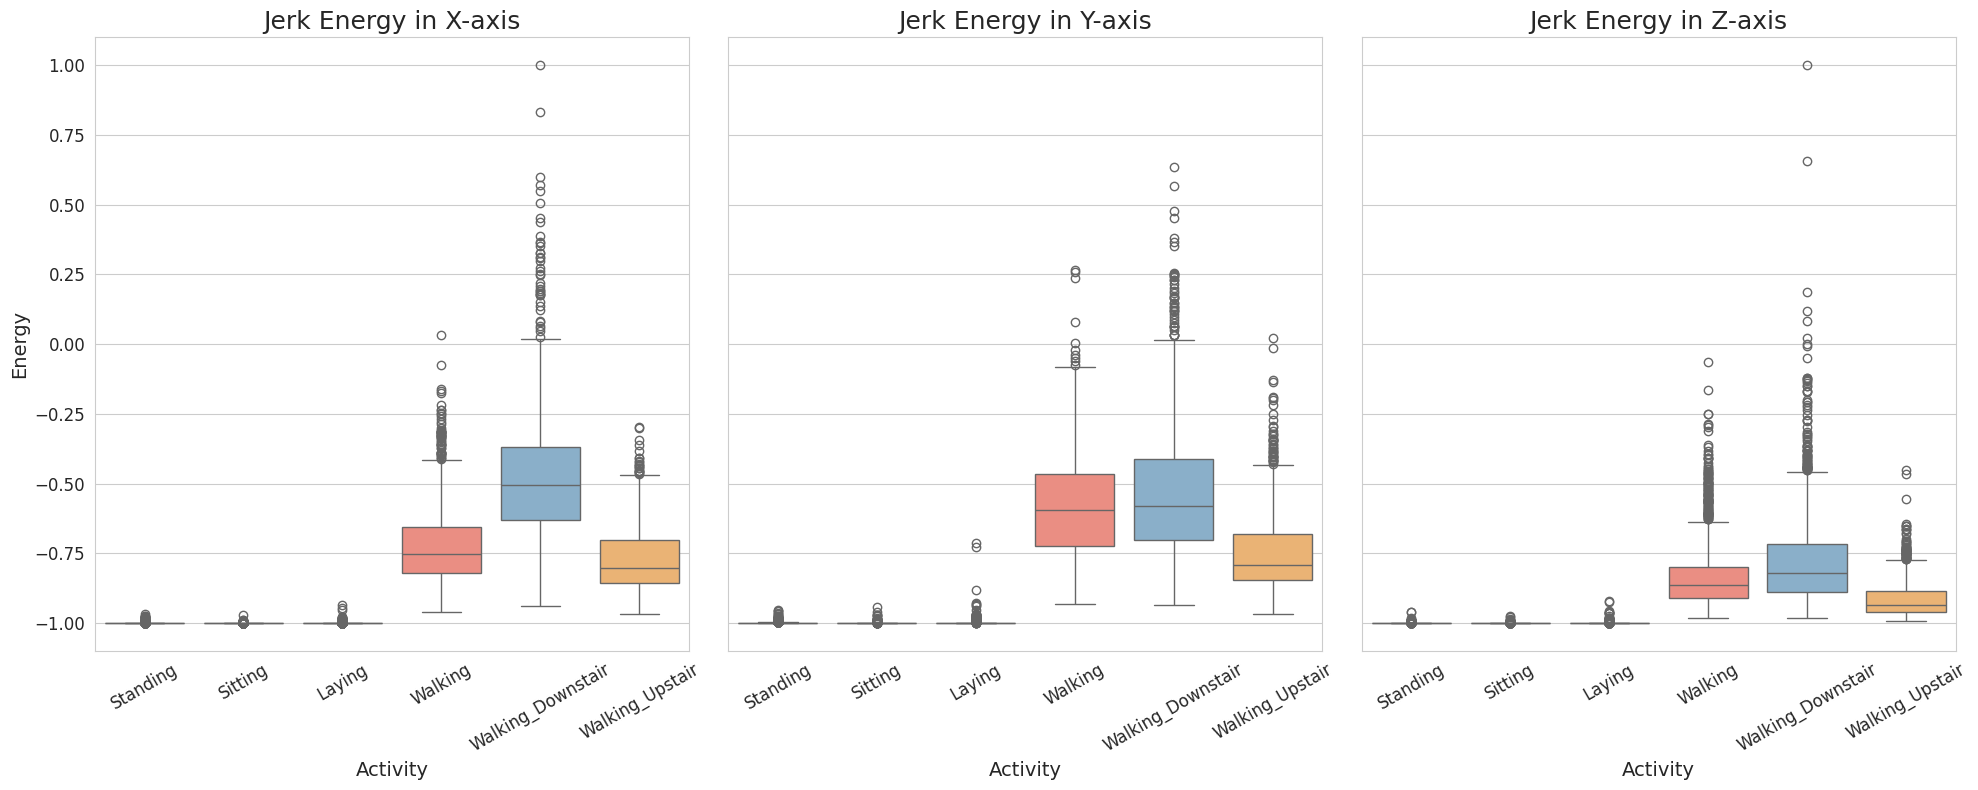

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

# Features for energy in accelerometer signals
features = ['tBodyAccJerkenergyX', 'tBodyAccJerkenergyY', 'tBodyAccJerkenergyZ']
titles = ['Jerk Energy in X-axis', 'Jerk Energy in Y-axis', 'Jerk Energy in Z-axis']

# Choose a color palette
palette = 'Set3'

for i, feature in enumerate(features):
    sns.boxplot(x='Activity', y=feature, data=train, ax=axes[i], palette=palette)
    axes[i].set_title(titles[i], fontsize=18)  # Title font size
    axes[i].set_xlabel('Activity', fontsize=14)  # X-axis label font size
    axes[i].set_ylabel('Energy', fontsize=14)  # Y-axis label font size
    axes[i].tick_params(axis='x', rotation=30, labelsize=12)  # Tick label font size
    axes[i].tick_params(axis='y', labelsize=12)  # Y-axis tick label size

plt.tight_layout()
plt.show()


**Static Activities:**
The energy values for static activities are consistently low and show little variation across all three axes.
These activities involve minimal movement, which leads to lower jerk energy or energy values along the axes.

**Dynamic Activities:**
The energy values for dynamic activities are significantly higher compared to static activities.
Among dynamic activities:
Walking_Downstairs and Walking_Upstairs show higher energy on average than simple Walking, likely due to the additional effort and abrupt movements required for navigating stairs.
The energy distributions for dynamic activities exhibit greater variation and wider interquartile ranges, indicating variability in movement intensity.

## TSNE to visualize different activities

In [ ]:
# # Defining a function that takes input and plots the t-SNE
# def perform_tsne(X_data, y_data, perplexities):
#     for index, perplexity in enumerate(perplexities):
#         # Perform t-SNE
#         X_reduced = TSNE(perplexity=perplexity, random_state=42).fit_transform(X_data)

#         # Getting required data for Seaborn plot
#         print(f"Creating plot for this t-SNE Visualization with Perplexity = {perplexity}...")
#         df = pd.DataFrame({'x': X_reduced[:, 0], 'y': X_reduced[:, 1], 'label': y_data})

#         # Plotting the data
#         sns.lmplot(
#             data=df, x='x', y='y', hue='label', fit_reg=False, height=8, # Use height instead of size
#             palette='Set1', markers=['o', 's', 'D', 'v', '^', '<']
#         )
#         plt.title(f"t-SNE Visualization (Perplexity: {perplexity})")
#         plt.show()
#         print("Done")

In [ ]:
# # X_tsne = train.drop(['Subject', 'Activity','Activity_Name'], axis=1)
# X_tsne = train.drop(['Activity'], axis=1)
# y_tsne = train['Activity']
# perform_tsne(X_data = X_tsne,y_data=y_tsne, perplexities =[2,5,10,20,50])

# Model

## K-nearest Neighbors Classifier

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.9857

Confusion Matrix:
[[537   0   0   0   0   0]
 [  0 418  71   0   0   2]
 [  0  18 514   0   0   0]
 [  0   0   0 489   0   7]
 [  0   0   0   1 411   8]
 [  0   0   0   5   0 466]]

Normalized Confusion Matrix:
[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.85132383 0.14460285 0.         0.         0.00407332]
 [0.         0.03383459 0.96616541 0.         0.         0.        ]
 [0.         0.         0.         0.9858871  0.         0.0141129 ]
 [0.         0.         0.         0.00238095 0.97857143 0.01904762]
 [0.         0.         0.         0.01061571 0.         0.98938429]]

Classification Report:
                   precision    recall  f1-score   support

           Laying       1.00      1.00      1.00       537
          Sitting       0.96      0.85      0.90       491
         Standing       0.88      0.97      0.92       532
          Walking       0.99      0.99  

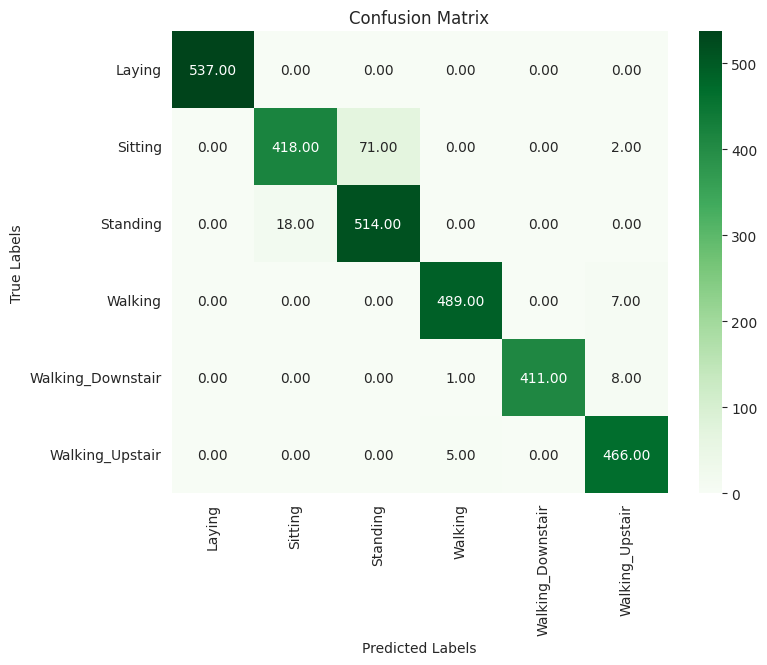

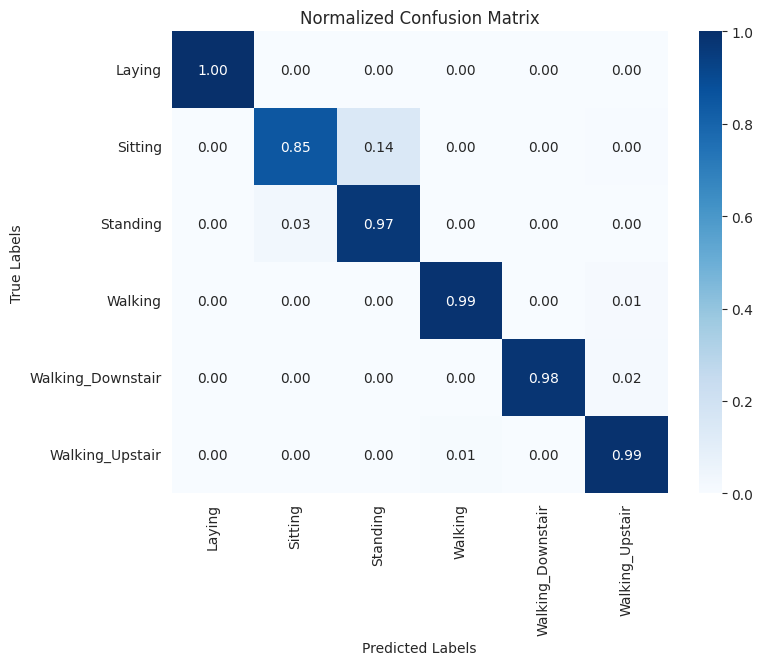

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Split data if necessary (e.g., validation split)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_normalized, y_train, test_size=0.2, random_state=42
)

# Parameter grid for kNN
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # Adjust based on your needs

# Set up GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv = 10, scoring='accuracy')
grid_search.fit(X_train_normalized, y_train)

# Print best parameters and score from grid search
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Use the best model from grid search
best_knn = grid_search.best_estimator_

# Make predictions on the test set
X_test_normalized = scaler.transform(X_test)
y_test_pred = best_knn.predict(X_test_normalized)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Evaluate the model's performance
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nNormalized Confusion Matrix:")
print(conf_matrix_normalized)

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()

QDA:


Confusion Matrix (QDA):
[[537   0   0   0   0   0]
 [  0 448  42   0   0   1]
 [  0  25 507   0   0   0]
 [  0   0   0 489   1   6]
 [  0   0   0   1 411   8]
 [  0   0   0   7   0 464]]

Normalized Confusion Matrix (QDA):
[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.91242363 0.08553971 0.         0.         0.00203666]
 [0.         0.04699248 0.95300752 0.         0.         0.        ]
 [0.         0.         0.         0.9858871  0.00201613 0.01209677]
 [0.         0.         0.         0.00238095 0.97857143 0.01904762]
 [0.         0.         0.         0.014862   0.         0.985138  ]]

Classification Report (QDA):
                   precision    recall  f1-score   support

           Laying       1.00      1.00      1.00       537
          Sitting       0.95      0.91      0.93       491
         Standing       0.92      0.95      0.94       532
          Walking       0.98      0.99      0.98       496
Walking_Downstair       1.00      0

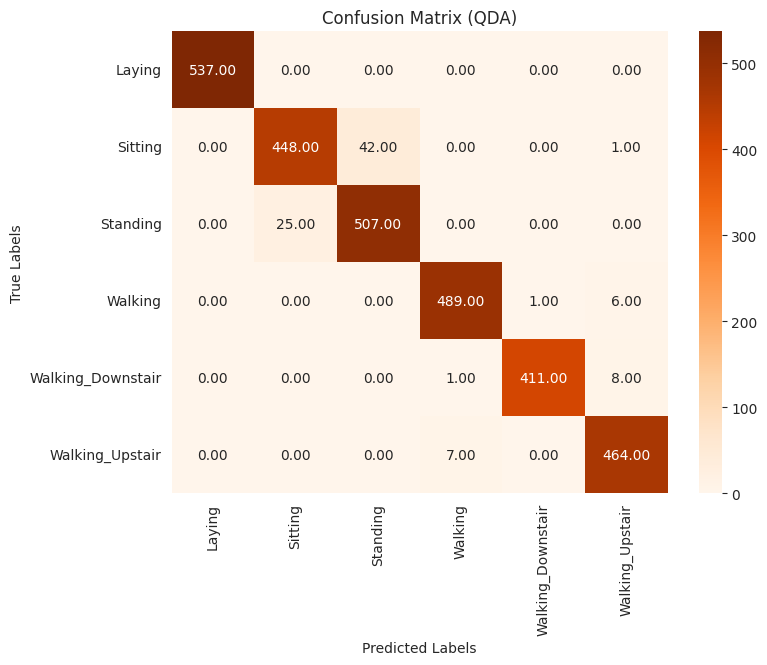

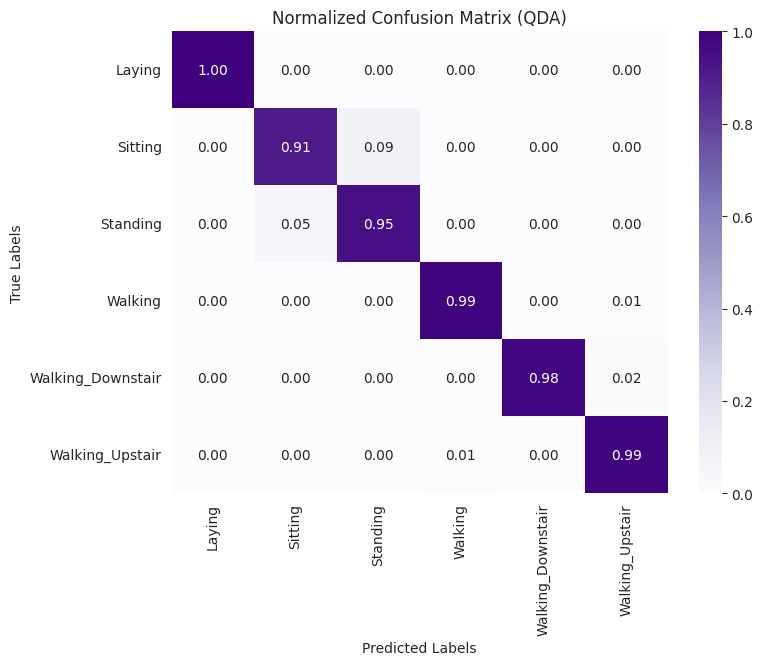

In [ ]:
# Train QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_normalized, y_train)

# Predict on the test set
y_test_pred_qda = qda.predict(X_test_normalized)

# Confusion matrix for QDA
conf_matrix_qda = confusion_matrix(y_test, y_test_pred_qda)
conf_matrix_qda_normalized = conf_matrix_qda.astype('float') / conf_matrix_qda.sum(axis=1)[:, np.newaxis]

# Evaluate QDA model performance
print("\nConfusion Matrix (QDA):")
print(conf_matrix_qda)
print("\nNormalized Confusion Matrix (QDA):")
print(conf_matrix_qda_normalized)

print("\nClassification Report (QDA):")
print(classification_report(y_test, y_test_pred_qda))

# Calculate overall accuracy for QDA
accuracy_qda = accuracy_score(y_test, y_test_pred_qda)
print(f"\nAccuracy (QDA): {accuracy_qda * 100:.2f}%")

# Plot confusion matrix for QDA
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_qda, annot=True, fmt='.2f', cmap='Oranges',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (QDA)')
plt.show()

# Plot normalized confusion matrix for QDA
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_qda_normalized, annot=True, fmt='.2f', cmap='Purples',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix (QDA)')
plt.show()

Logistic Regression Model

In [ ]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [ ]:
# Importing necessary libraries

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [ ]:
from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [ ]:
labels=['Laying', 'Sitting','Standing','Walking','Walking_Downstairs','Walking_Upstairs']

In [ ]:
# Generic function to any model

from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):

    results = dict()
    train_start_time = datetime.now()
    model.fit(X_train, y_train)
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    printmd('Training_time(HH:MM:SS.ms) - {}'.format(results['training_time']), color='blue')

    # calculate & print the test time

    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    printmd('testing time(HH:MM:SS:ms) - {}'.format(results['testing_time']), color='blue')
    results['predicted'] = y_pred

    # calculate the Accuracy of Model

    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    results['accuracy'] = accuracy
    printmd('**Accuracy:**', color='blue')
    print('{}'.format(accuracy))

    # Confusion Matrix

    cm = metrics.confusion_matrix(y_test, y_pred)
    printmd('**Confusion Matrix:**', color='blue')
    plt.figure(figsize=(8,8))
    # Changed b=False to visible=False
    plt.grid(visible=False)
    plot_confusion_matrix(cm, classes=labels, title='Normalized confusion matrix', cmap=plt.cm.YlGn, )
    plt.show()

    # Plotting Normalized Confusion Matrix

    printmd('**Normalized Confusion Matrix:**', color='blue')
    plt.figure(figsize=(8,8))
    # Changed b=False to visible=False
    plt.grid(visible=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()

    # PLotting classification report

    printmd('**Classifiction Report**', color='blue')
    classification_report = metrics.classification_report(y_test, y_pred)
    results['classification_report'] = classification_report
    print(classification_report)

    # Adding the trained model to the results

    results['model'] = model

    return results

In [ ]:
# Creating a function to print text in Bold and in given color

from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [ ]:
# Function to plot Confusion Matrix

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [ ]:
def print_grid_search_attributes(model):

    # the best estimator that gave highest score

    printmd('**Best Estimator:**', color='blue')
    print('{}\n'.format(model.best_estimator_))


    # the best parameters that gave best results

    printmd('**Best parameters:**', color='blue')
    print('{}\n'.format(model.best_params_))


    # the number of cross validation splits

    printmd('**Number of CrossValidation sets:**', color='blue')
    print('{}\n'.format(model.n_splits_))


    # the Best score of the best estimator

    printmd('**Best Score:**', color='blue')
    print('{}\n'.format(model.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:00:06.849655</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00.000876</span>

<span style='color:blue'>**Accuracy:**</span>

0.9633525619273838


<span style='color:blue'>**Confusion Matrix:**</span>

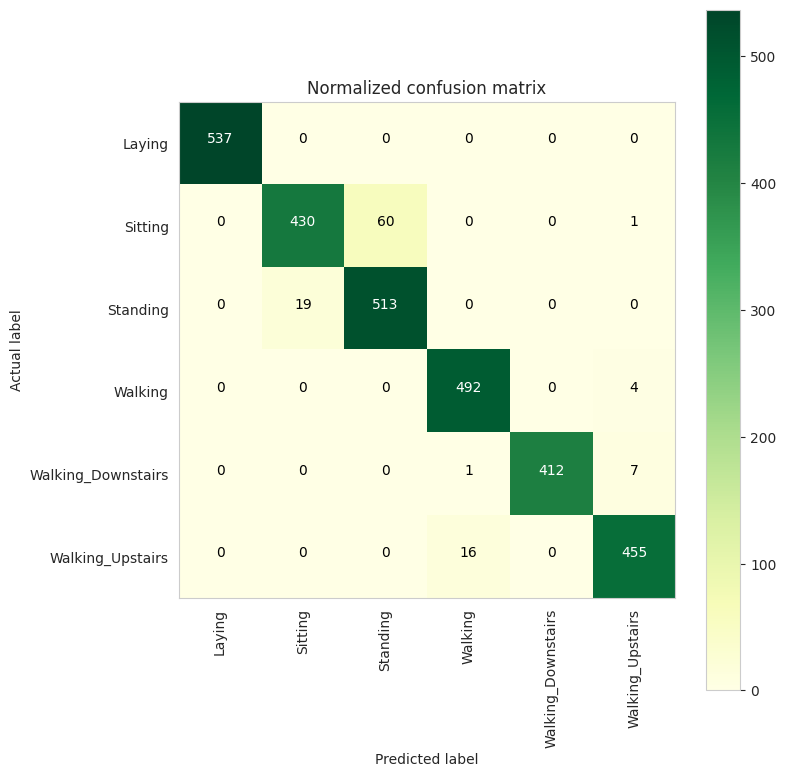

<span style='color:blue'>**Normalized Confusion Matrix:**</span>

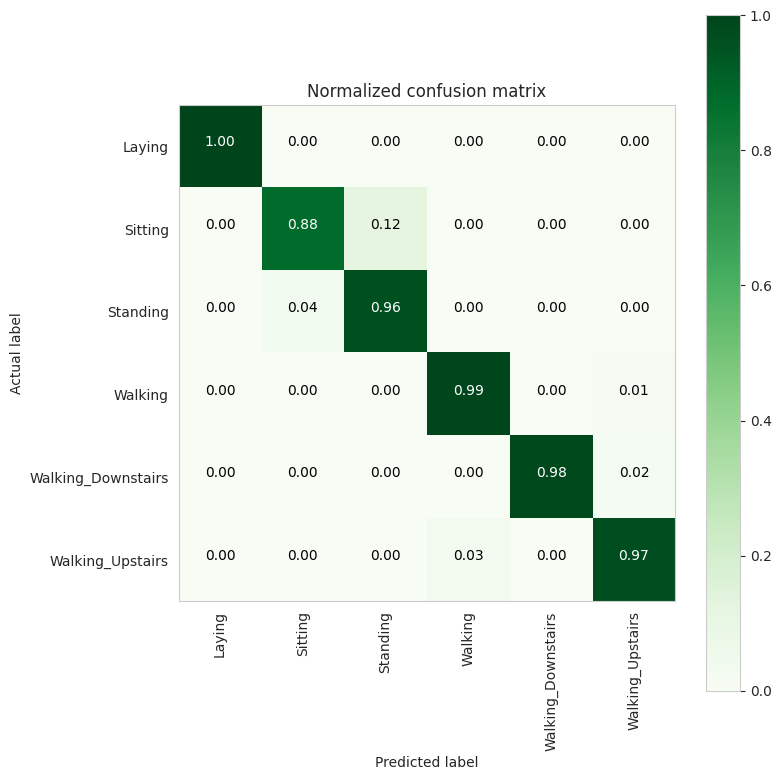

<span style='color:blue'>**Classifiction Report**</span>

                   precision    recall  f1-score   support

           Laying       1.00      1.00      1.00       537
          Sitting       0.96      0.88      0.91       491
         Standing       0.90      0.96      0.93       532
          Walking       0.97      0.99      0.98       496
Walking_Downstair       1.00      0.98      0.99       420
  Walking_Upstair       0.97      0.97      0.97       471

         accuracy                           0.96      2947
        macro avg       0.97      0.96      0.96      2947
     weighted avg       0.96      0.96      0.96      2947



<span style='color:blue'>**Best Estimator:**</span>

LogisticRegression(C=20)



<span style='color:blue'>**Best parameters:**</span>

{'C': 20, 'penalty': 'l2'}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

5



<span style='color:blue'>**Best Score:**</span>

0.9838137784005513



In [ ]:
# define the parameters to be tuned

parameters = {'C':[20, 25, 30, 35, 40], 'penalty':['l1', 'l2']}

# initiate the model

log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# the best attributes of the model

print_grid_search_attributes(log_reg_grid_results['model'])

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

Best parameters: {'C': 1, 'kernel': 'linear'}
Best cross-validation score: 0.9861

Confusion Matrix:
[[537   0   0   0   0   0]
 [  0 427  63   0   0   1]
 [  0  19 513   0   0   0]
 [  0   0   0 490   0   6]
 [  0   0   0   1 410   9]
 [  0   0   0  15   0 456]]

Normalized Confusion Matrix:
[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.86965377 0.12830957 0.         0.         0.00203666]
 [0.         0.03571429 0.96428571 0.         0.         0.        ]
 [0.         0.         0.         0.98790323 0.         0.01209677]
 [0.         0.         0.         0.00238095 0.97619048 0.02142857]
 [0.         0.         0.         0.03184713 0.         0.96815287]]

Classification Report:
                   precision    recall  f1-score   support

           Laying       1.00      1.00      1.00       537
          Sitting       0.96      0.87      0.91       491
         Standing       0.89      0.96      0.93       532
          Walking       0.97  

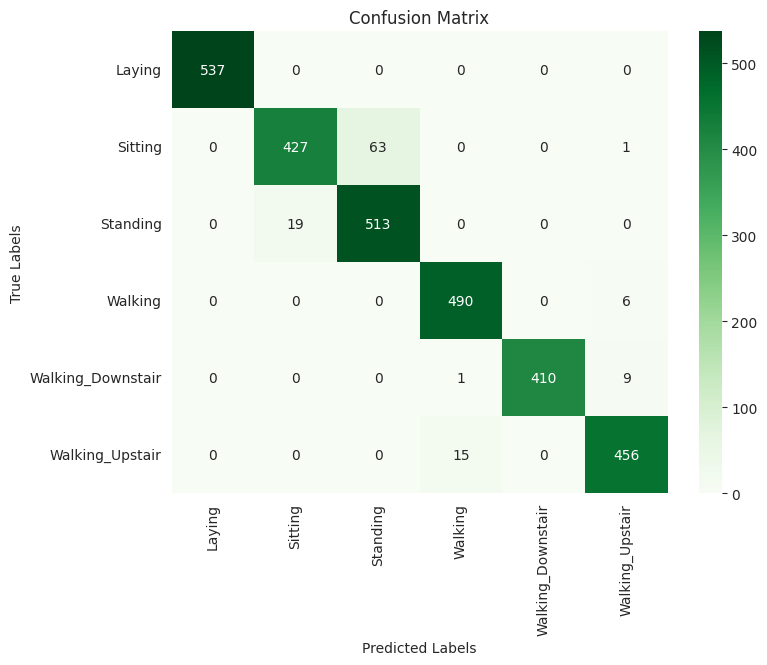

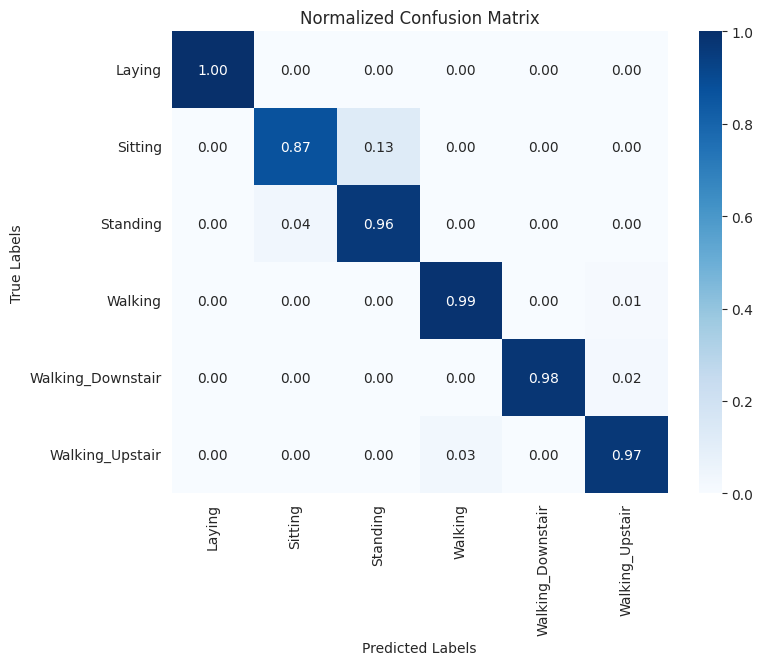

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Split data into training and validation if necessary
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_normalized, y_train, test_size=0.2, random_state=42
)

# Parameter grid for SVM
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}  # Adjust as needed

# Set up GridSearchCV
svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_normalized, y_train)

# Print best parameters and score from grid search
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Use the best model from grid search
best_svm = grid_search.best_estimator_

# Make predictions on the test set
X_test_normalized = scaler.transform(X_test)
y_test_pred = best_svm.predict(X_test_normalized)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Evaluate the model's performance
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nNormalized Confusion Matrix:")
print(conf_matrix_normalized)

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()

## Linear SVC

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best parameters: {'C': 8}
Best cross-validation score: 0.9856

Confusion Matrix:
[[537   0   0   0   0   0]
 [  0 427  62   0   0   2]
 [  0  21 511   0   0   0]
 [  0   0   0 492   0   4]
 [  0   0   0   1 413   6]
 [  0   5   0  12   0 454]]

Normalized Confusion Matrix:
[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.86965377 0.12627291 0.         0.         0.00407332]
 [0.         0.03947368 0.96052632 0.         0.         0.        ]
 [0.         0.         0.         0.99193548 0.         0.00806452]
 [0.         0.         0.         0.00238095 0.98333333 0.01428571]
 [0.         0.01061571 0.         0.02547771 0.         0.96390658]]

Classification Report:
                   precision    recall  f1-score   support

           Laying       1.00      1.00      1.00       537
          Sitting       0.94      0.87      0.90       491
         Standing       0.89      0.96      0.92

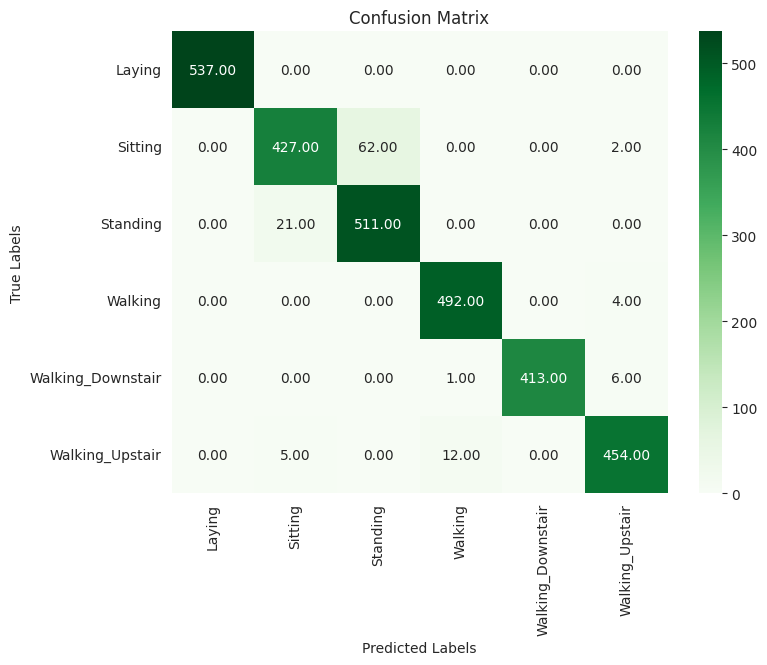

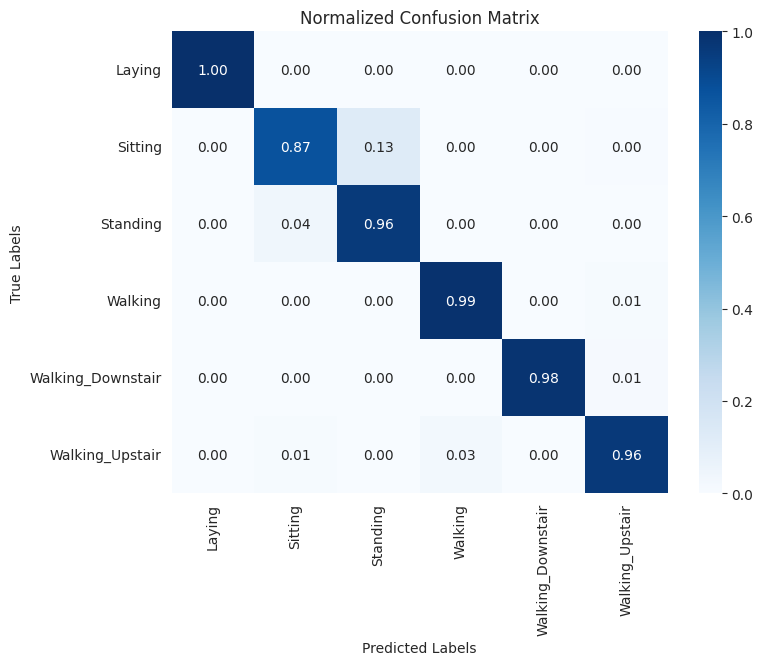

In [ ]:
from sklearn.svm import LinearSVC
# Normalize the features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)


# Parameter grid for LinearSVC
parameters = {'C': [0.125, 0.5, 1, 2, 8, 16]}

# Set up LinearSVC with GridSearchCV
linear_svc = LinearSVC(tol=0.00005, max_iter=10000)  # Ensure convergence with larger max_iter
linear_svc_grid = GridSearchCV(estimator=linear_svc, param_grid=parameters, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_fit = linear_svc_grid.fit(X_train_normalized, y_train)

# Print best parameters and cross-validation score
print(f"Best parameters: {linear_svc_grid.best_params_}")
print(f"Best cross-validation score: {linear_svc_grid.best_score_:.4f}")

# Use the best model from grid search
best_linear_svc = linear_svc_grid.best_estimator_

# Normalize the test data
X_test_normalized = scaler.transform(X_test)

# Make predictions on the test set
y_test_pred = best_linear_svc.predict(X_test_normalized)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Evaluate the model's performance
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nNormalized Confusion Matrix:")
print(conf_matrix_normalized)

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()

# Super Model

Stacking Classifier Cross-Validation Mean Accuracy: 98.15%
Stacking Classifier Test Accuracy: 96.44%

Classification Report:
Laying: Precision=1.00, Recall=1.00, F1-Score=1.00
Sitting: Precision=0.96, Recall=0.89, F1-Score=0.92
Standing: Precision=0.90, Recall=0.96, F1-Score=0.93
Walking: Precision=0.97, Recall=0.99, F1-Score=0.98
Walking_Downstair: Precision=1.00, Recall=0.97, F1-Score=0.99
Walking_Upstair: Precision=0.97, Recall=0.97, F1-Score=0.97
macro avg: Precision=0.97, Recall=0.96, F1-Score=0.96
weighted avg: Precision=0.97, Recall=0.96, F1-Score=0.96


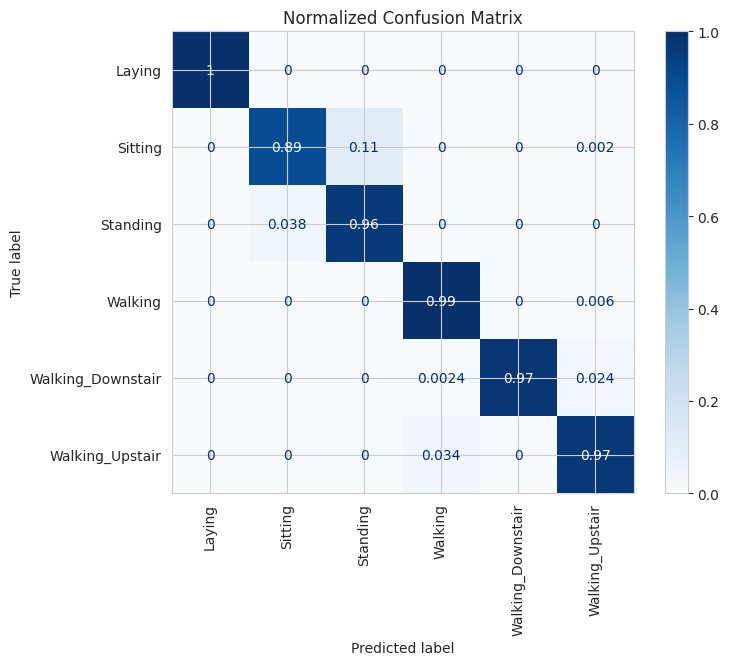

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define the base models
logistic_model = LogisticRegression(C=20, penalty='l2', max_iter=1000)
svm_model = SVC(C=5, kernel='linear', probability=True)
linear_svc_model = LinearSVC(C=8, max_iter=1000)
knn_model = KNeighborsClassifier(n_neighbors=10)
qda_model = QDA()
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Define the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('logistic', logistic_model),
        ('svm', svm_model),
        ('linear_svc', linear_svc_model),
        ('knn', knn_model),
        ('qda', qda_model),
        ('rf', rf_model)
    ],
    final_estimator=SVC(C=5, kernel='linear', probability=True),  # Meta-model
    cv=5  # Cross-validation
)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(stacking_clf, X_train, y_train, cv=5)
cv_mean = np.mean(cv_scores)

# Predict on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

# Print key performance metrics
print(f"Stacking Classifier Cross-Validation Mean Accuracy: {cv_mean:.2%}")
print(f"Stacking Classifier Test Accuracy: {test_accuracy:.2%}")
print("\nClassification Report:")
for activity, metrics in report.items():
    if isinstance(metrics, dict):
        print(f"{activity}: Precision={metrics['precision']:.2f}, Recall={metrics['recall']:.2f}, F1-Score={metrics['f1-score']:.2f}")

# Plot normalized confusion matrix
# Plot normalized confusion matrix with vertical x-axis labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=stacking_clf.classes_)
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size for better clarity
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.title("Normalized Confusion Matrix")
plt.show()


Stacking Classifier Cross-Validation Mean Accuracy: 98.14%
Stacking Classifier Test Accuracy: 96.47%

Classification Report:
Laying: Precision=1.00, Recall=1.00, F1-Score=1.00
Sitting: Precision=0.96, Recall=0.89, F1-Score=0.92
Standing: Precision=0.91, Recall=0.96, F1-Score=0.93
Walking: Precision=0.97, Recall=0.99, F1-Score=0.98
Walking_Downstair: Precision=1.00, Recall=0.97, F1-Score=0.99
Walking_Upstair: Precision=0.97, Recall=0.97, F1-Score=0.97
macro avg: Precision=0.97, Recall=0.96, F1-Score=0.97
weighted avg: Precision=0.97, Recall=0.96, F1-Score=0.96